# Imports

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from HW4 import *
from utils import *

plt.style.use(['science','no-latex'])

# Enunciado

<img src="images/enunciadoa.png" style="width: 850px;"/>

<img src="images/enunciadoc.png" style="width: 850px;"/>

## Item (B)

In [173]:
# constants
t0 = 0
y0 = np.array([1])
tf = 20
r,K = 2,10_0000
h = 0.1
n = int((tf-t0)/h)


# Cauchy
def y_dot(t:float,y:np.array) -> np.array:
    r,K = 2,10_0000
    return np.array([r*(1-(y/K))*y])


# Exact Solution
def y_true(t:float) -> np.array:
    y0 = 1
    r,K = 2,10_0000
    sol = (y0*K)/(y0 + (K-y0)*np.exp(-r*t))
    return np.array([sol])

In [174]:
# EDO
edo_tarefa4a = EDONumSol(y_dot = y_dot,
                         y_0 = y0,
                         t_0 = t0,
                         t_f = tf,
                         h = h)

# Exact Solution - creating exact solution for plots
t_e = np.linspace(t0,tf,10000)
y_exact = np.array([y_true(t_) for t_ in t_e]).swapaxes(0,1)

### Convergence Analysis

In [175]:
conv_analysis = edo_tarefa4a.convergence_analysis(h_0 = 0.1, 
                                                  max_evals=10, 
                                                  y_true = y_true,
                                                  method = "HW4")

tables_convergence = [conv_analysis(initialization_method = m) for m in ["exact","euler-improved","euler-explicit", "noise"]]

In [159]:
conv_tables = pd.concat([df.set_index(['k', 'h_k']) for df in tables_convergence], axis=1)
conv_tables

,,error_var0,p_var0,error_var0,p_var0,error_var0,p_var0,error_var0,p_var0
k,h_k,,,,,,,,
0,0.100000,9244.025370,NaN,9307.994468,NaN,10226.411967,NaN,20682.835479,NaN
1,0.050000,2649.294171,1.802913,2657.476861,1.808413,2898.619704,1.818862,8070.094742,1.357776
2,0.025000,708.766940,1.902225,709.801629,1.904569,771.143909,1.910294,3316.053834,1.283118
3,0.012500,183.116778,1.952547,183.246454,1.953631,198.712795,1.956315,1459.938755,1.183560
4,0.006250,46.524319,1.976707,46.540539,1.977225,50.421398,1.978577,678.212799,1.106098
5,0.003125,11.724323,1.988480,11.726350,1.988734,12.698318,1.989399,325.895140,1.057330
6,0.001563,2.942741,1.994272,2.942995,1.994397,3.186180,1.994738,159.610192,1.029855
7,0.000781,0.737142,1.997147,0.737173,1.997209,0.797994,1.997377,78.966475,1.015241
8,0.000391,0.184467,1.998576,0.184471,1.998607,0.199680,1.998691,39.273047,1.007701


In [22]:
conv_analysis_ab3 = edo_tarefa4a.convergence_analysis(h_0 = 0.1, 
                                                      max_evals=10, 
                                                      y_true = y_true,
                                                      method = "AB-3")

tables_convergence_ab3 = [conv_analysis_ab3(initialization_method = m) for m in ["exact","euler-improved","euler-explicit", "noise"]]

In [23]:
pd.concat([df.set_index(['k', 'h_k']) for df in tables_convergence_ab3], axis=1)

,,error_var0,p_var0,error_var0,p_var0,error_var0,p_var0,error_var0,p_var0
k,h_k,,,,,,,,
0,0.100000,415.870714,NaN,474.578820,NaN,1319.101531,NaN,10134.877975,NaN
1,0.050000,58.926986,2.819135,66.729709,2.830247,295.505128,2.158301,4979.737256,1.025187
2,0.025000,7.843478,2.909363,8.850192,2.914549,68.535607,2.108258,2486.174646,1.002142
3,0.012500,1.011670,2.954755,1.139628,2.957146,16.401306,2.063043,1245.340813,0.997387
4,0.006250,0.128459,2.977360,0.144592,2.978499,4.004732,2.034033,623.693024,0.997633
5,0.003125,0.016184,2.988660,0.018210,2.989222,0.988951,2.017734,312.153645,0.998580
6,0.001563,0.002031,2.994328,0.002285,2.994606,0.245692,2.009047,156.160933,0.999223
7,0.000781,0.000254,2.997162,0.000286,2.997302,0.061229,2.004569,78.102421,0.999594
8,0.000391,0.000032,2.998579,0.000036,2.998643,0.015283,2.002296,39.056816,0.999793


In [163]:
for index, row in conv_tables.reset_index().iterrows():
    k, h_k, error_var0, p_var0, error_var1, p_var1, error_var2, p_var2, error_var3, p_var3 = row
    r_table = f"${2**k:.0f}$ & ${error_var0:.1f}$ & ${p_var0:.2f}$ & ${error_var1:.1f}$ & ${p_var1:.2f}$ & ${error_var2:.1f}$ & ${p_var2:.2f}$ & ${error_var3:.1f}$ & ${p_var3:.2f}$\\\\\n"
    print(r_table.replace("nan","-"))

$1$ & $9244.0$ & $-$ & $9308.0$ & $-$ & $10226.4$ & $-$ & $20682.8$ & $-$\\

$2$ & $2649.3$ & $1.80$ & $2657.5$ & $1.81$ & $2898.6$ & $1.82$ & $8070.1$ & $1.36$\\

$4$ & $708.8$ & $1.90$ & $709.8$ & $1.90$ & $771.1$ & $1.91$ & $3316.1$ & $1.28$\\

$8$ & $183.1$ & $1.95$ & $183.2$ & $1.95$ & $198.7$ & $1.96$ & $1459.9$ & $1.18$\\

$16$ & $46.5$ & $1.98$ & $46.5$ & $1.98$ & $50.4$ & $1.98$ & $678.2$ & $1.11$\\

$32$ & $11.7$ & $1.99$ & $11.7$ & $1.99$ & $12.7$ & $1.99$ & $325.9$ & $1.06$\\

$64$ & $2.9$ & $1.99$ & $2.9$ & $1.99$ & $3.2$ & $1.99$ & $159.6$ & $1.03$\\

$128$ & $0.7$ & $2.00$ & $0.7$ & $2.00$ & $0.8$ & $2.00$ & $79.0$ & $1.02$\\

$256$ & $0.2$ & $2.00$ & $0.2$ & $2.00$ & $0.2$ & $2.00$ & $39.3$ & $1.01$\\

$512$ & $0.0$ & $2.00$ & $0.0$ & $2.00$ & $0.0$ & $2.00$ & $19.6$ & $1.00$\\



### Graphs

In [176]:
ini_method = ["exact","euler-improved","euler-explicit", "noise"]

sol_rk = []
t = []
for m in ini_method:
    t_,sol = edo_tarefa4a.solve_multistep(h=0.1,method = "HW4",y_true=y_true,initialization_method = m)
    sol = np.array(sol).swapaxes(0,1)
    t.append(t_)
    sol_rk.append(sol)

/Users/welberth.nascimento/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


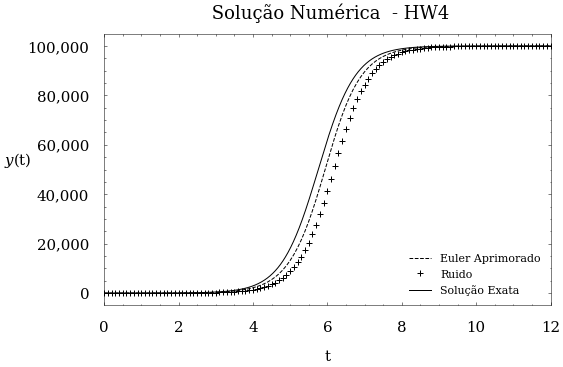

In [179]:
title = " Solução Numérica  - HW4"
fig,ax = plt.subplots(figsize=(8,5))
#ax.plot(t[0],sol_rk[0][0],'k--',dashes=[10,8], label="Initialização = Solução Exata") #,'k--',dashes=[10,8]
ax.plot(t[1],sol_rk[1][0],'k--', label="Euler Aprimorado")
ax.plot(t[2],sol_rk[3][0],'k+', label="Ruido") 
ax.plot(t_e,y_exact[0],'k-', label="Solução Exata")
ax.set_title(title,fontsize=18, pad = 15)
ax.set_xlabel('t', fontsize=15, labelpad = 15)
ax.set_ylabel('$y$(t)', fontsize=15, rotation = 0, labelpad = 10)
ax.tick_params(axis='both', which='major', labelsize=15, pad=15)
ax.legend(fontsize=11, loc="lower right");
#ax.set_ylim([0,10])
ax.set_xlim([0,12]);
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.savefig(f'images/logistic.png', dpi=200)

/Users/welberth.nascimento/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


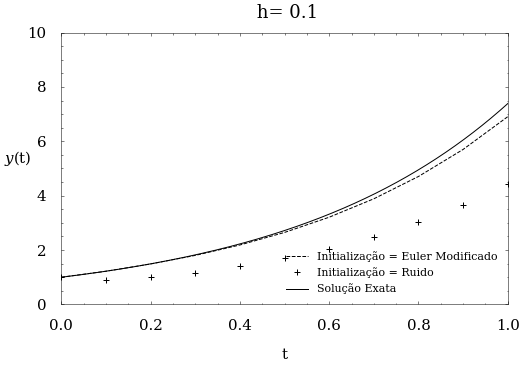

In [57]:
title = " h= 0.1"
fig,ax = plt.subplots(figsize=(8,5))
#ax.plot(t[0],sol_rk[0][0],'k--',dashes=[10,8], label="Initialização = Solução Exata") #,'k--',dashes=[10,8]
ax.plot(t[1],sol_rk[1][0],'k--', label="Initialização = Euler Modificado")
ax.plot(t[2],sol_rk[3][0],'k+', label="Initialização = Ruido") 
ax.plot(t_e,y_exact[0],'k-', label="Solução Exata")
ax.set_title(title,fontsize=18, pad = 15)
ax.set_xlabel('t', fontsize=15, labelpad = 15)
ax.set_ylabel('$y$(t)', fontsize=15, rotation = 0, labelpad = 10)
ax.tick_params(axis='both', which='major', labelsize=15, pad=15)
ax.legend(fontsize=11, loc="lower right");
ax.set_ylim([0,10])
ax.set_xlim([0,1]);
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()]);

## Item (C)

In [111]:
# constants
t0 = 0
y0 = np.array([1])
tf = 20
r,K = 2,10_0000
h = 0.1
n = int((tf-t0)/h)

# Cauchy

def y_dot2(t:float,y:np.array) -> np.array:
    return np.array([-np.sin(t)])

# True Solution

def y_true2(t:float) -> np.array:
    return np.array([np.cos(t)])

In [112]:
# EDO item C

edo_tarefa4c = EDONumSol(y_dot = y_dot2,
                         y_0 = y0,
                         t_0 = t0,
                         t_f = tf,
                         h = h)

# Exact Solution item C
t_e2 = np.linspace(t0,tf,10000)
y_exact2 = np.array([y_true2(t_) for t_ in t_e]).swapaxes(0,1)

### Graphs

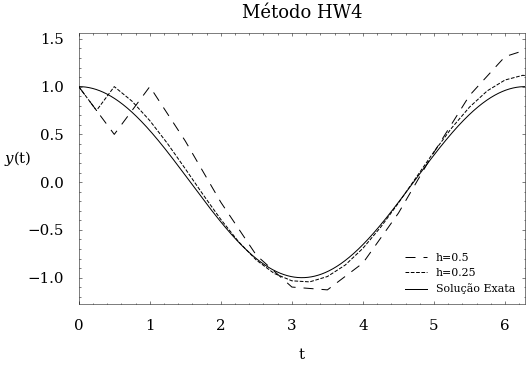

In [184]:
hs = [0.5,0.25]
sol_c = []
t = []
for h in hs:
    t_,sol = edo_tarefa4c.solve_multistep(h=h,method = "HW4",y_true=y_true2,initialization_method = "noise")
    sol = np.array(sol).swapaxes(0,1)
    t.append(t_)
    sol_c.append(sol)
    
title = "Método HW4"
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(t[0],sol_c[0][0],'k--',dashes=[10,8], label=f"h={hs[0]}") #,'k--',dashes=[10,8]
ax.plot(t[1],sol_c[1][0],'k--', label=f"h={hs[1]}")
ax.plot(t_e2,y_exact2[0],'k-', label="Solução Exata")
ax.set_title(title,fontsize=18, pad = 15)
ax.set_xlabel('t', fontsize=15, labelpad = 15)
ax.set_ylabel('$y$(t)', fontsize=15, rotation = 0, labelpad = 10)
ax.tick_params(axis='both', which='major', labelsize=15, pad=15)
ax.legend(fontsize=11, loc = "lower right") #,bbox_to_anchor=(1.01, 0.65), loc=2
#ax.set_ylim([0,10])
ax.set_xlim([0,2*np.pi]);
plt.savefig(f'images/cos_HW4.png', dpi=200)

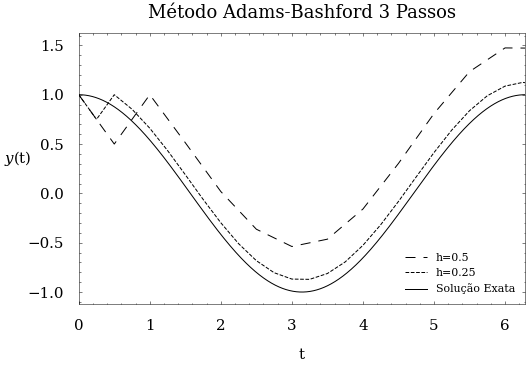

In [183]:
hs = [0.5,0.25]
sol_c = []
t = []
for h in hs:
    t_,sol = edo_tarefa4c.solve_multistep(h=h,method = "AB-3",y_true=y_true2,initialization_method = "noise")
    sol = np.array(sol).swapaxes(0,1)
    t.append(t_)
    sol_c.append(sol)
    
title = "Método Adams-Bashford 3 Passos"
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(t[0],sol_c[0][0],'k--',dashes=[10,8], label=f"h={hs[0]}") #,'k--',dashes=[10,8]
ax.plot(t[1],sol_c[1][0],'k--', label=f"h={hs[1]}")
ax.plot(t_e2,y_exact2[0],'k-', label="Solução Exata")
ax.set_title(title,fontsize=18, pad = 15)
ax.set_xlabel('t', fontsize=15, labelpad = 15)
ax.set_ylabel('$y$(t)', fontsize=15, rotation = 0, labelpad = 10)
ax.tick_params(axis='both', which='major', labelsize=15, pad=15)
ax.legend(fontsize=11, loc = "lower right") #,bbox_to_anchor=(1.01, 0.65), loc=2
#ax.set_ylim([0,10])
ax.set_xlim([0,2*np.pi]);
plt.savefig(f'images/cos_AB3.png', dpi=200)

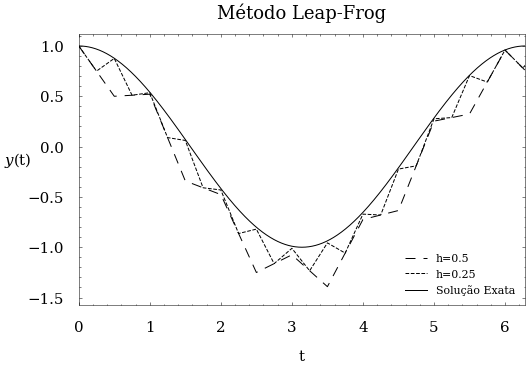

In [182]:
hs = [0.5,0.25]
sol_c = []
t = []
for h in hs:
    t_,sol = edo_tarefa4c.solve_multistep(h=h,method = "Leap-Frog",y_true=y_true2,initialization_method = "noise")
    sol = np.array(sol).swapaxes(0,1)
    t.append(t_)
    sol_c.append(sol)
    
title = "Método Leap-Frog"
fig,ax = plt.subplots(figsize=(8,5))
ax.plot(t[0],sol_c[0][0],'k--',dashes=[10,8], label=f"h={hs[0]}") #,'k--',dashes=[10,8]
ax.plot(t[1],sol_c[1][0],'k--', label=f"h={hs[1]}")
ax.plot(t_e2,y_exact2[0],'k-', label="Solução Exata")
ax.set_title(title,fontsize=18, pad = 15)
ax.set_xlabel('t', fontsize=15, labelpad = 15)
ax.set_ylabel('$y$(t)', fontsize=15, rotation = 0, labelpad = 10)
ax.tick_params(axis='both', which='major', labelsize=15, pad=15)
ax.legend(fontsize=11, loc = "lower right") #,bbox_to_anchor=(1.01, 0.65), loc=2
#ax.set_ylim([0,10])
ax.set_xlim([0,2*np.pi]);
plt.savefig(f'images/cos_LeapFrog.png', dpi=200)

### Convergence Analysis

In [195]:
conv_analysis_cos = edo_tarefa4c.convergence_analysis(h_0 = 0.1, 
                                                      max_evals=10, 
                                                      y_true = y_true2,
                                                      initialization_method = "noise")

tables_convergence_cos = [conv_analysis_cos(method = m) for m in ["HW4","AB-3","Leap-Frog"]]

In [196]:
conv_tables_cos = pd.concat([df.set_index(['k', 'h_k']) for df in tables_convergence_cos], axis=1)

In [199]:
for index, row in conv_tables_cos.reset_index().iterrows():
    k, h_k, error_var0, p_var0, error_var1, p_var1, error_var2, p_var2 = row
    r_table = f"${2**k:.0f}$ & ${error_var0:.4f}$ & ${p_var0:.4f}$ & ${error_var1:.4f}$ & ${p_var1:.4f}$ & ${error_var2:.4f}$ & ${p_var2:.4f}$\\\\\n"
    print(r_table.replace("nan","-"))

$1$ & $0.0950$ & $-$ & $0.0950$ & $-$ & $0.0983$ & $-$\\

$2$ & $0.0488$ & $0.9626$ & $0.0488$ & $0.9626$ & $0.0496$ & $0.9878$\\

$4$ & $0.0247$ & $0.9816$ & $0.0247$ & $0.9816$ & $0.0249$ & $0.9940$\\

$8$ & $0.0124$ & $0.9909$ & $0.0124$ & $0.9909$ & $0.0125$ & $0.9970$\\

$16$ & $0.0062$ & $0.9955$ & $0.0062$ & $0.9955$ & $0.0062$ & $0.9985$\\

$32$ & $0.0031$ & $0.9977$ & $0.0031$ & $0.9977$ & $0.0031$ & $0.9992$\\

$64$ & $0.0016$ & $0.9989$ & $0.0016$ & $0.9989$ & $0.0016$ & $0.9996$\\

$128$ & $0.0008$ & $0.9994$ & $0.0008$ & $0.9994$ & $0.0008$ & $0.9998$\\

$256$ & $0.0004$ & $0.9997$ & $0.0004$ & $0.9997$ & $0.0004$ & $0.9999$\\

$512$ & $0.0002$ & $0.9999$ & $0.0002$ & $0.9999$ & $0.0002$ & $1.0000$\\



In [143]:
edo_tarefa4c.convergence_analysis(h_0 = 1, 
                                 max_evals=10, 
                                 y_true = y_true2,
                                 method = "HW4",
                                 initialization_method = "noise")

,k,h_k,error_var0,p_var0
0,0,1.000000,1.753303,NaN
1,1,0.500000,0.484223,1.856333
2,2,0.250000,0.218912,1.145317
3,3,0.125000,0.117198,0.901410
4,4,0.062500,0.060548,0.952804
5,5,0.031250,0.030762,0.976930
6,6,0.015625,0.015503,0.988597
7,7,0.007812,0.007782,0.994331
8,8,0.003906,0.003899,0.997174
9,9,0.001953,0.001951,0.998589


In [144]:
edo_tarefa4c.convergence_analysis(h_0 = 1, 
                                 max_evals=10, 
                                 y_true = y_true2,
                                 method = "AB-3",
                                 initialization_method = "noise")

,k,h_k,error_var0,p_var0
0,0,1.000000,2.047749,NaN
1,1,0.500000,0.526455,1.959657
2,2,0.250000,0.218912,1.265956
3,3,0.125000,0.117198,0.901410
4,4,0.062500,0.060548,0.952804
5,5,0.031250,0.030762,0.976930
6,6,0.015625,0.015503,0.988597
7,7,0.007812,0.007782,0.994331
8,8,0.003906,0.003899,0.997174
9,9,0.001953,0.001951,0.998589


In [168]:
edo_tarefa4c.convergence_analysis(h_0 = 1, 
                                 max_evals=10, 
                                 y_true = y_true2,
                                 method = "Leap-Frog",
                                 initialization_method = "noise")

,k,h_k,error_var0,p_var0
0,0,1.000000,0.828602,NaN
1,1,0.500000,0.458037,0.855215
2,2,0.250000,0.239563,0.935059
3,3,0.125000,0.122395,0.968864
4,4,0.062500,0.061849,0.984723
5,5,0.031250,0.031087,0.992425
6,6,0.015625,0.015584,0.996228
7,7,0.007812,0.007802,0.998118
8,8,0.003906,0.003904,0.999060
9,9,0.001953,0.001952,0.999530
